### Problem

We would like to find the eigenvalue spectrum of 

$$
SUU^TS^T
$$

where
  - $U$, a $N$-by-$K$ orthogonal embedding matrix,
  - $S$, a $M$-by-$N$ random sampling matrix,
  - $K \leq M$.

We will use the short hand

$$
A = SU, m = \frac{M}{N}, k = \frac{K}{N}
$$

We aim to find the eigenvalue spectrum of $AA^T$, $\mu^{AA^T}(\lambda)$, through its Steijles transform,

$$
\begin{align}
G^{AA^T}(z) &= \int \frac{1}{z - \lambda} d\mu^{AA^T}(\lambda) \\
&= \lim_{N \to \infty} \sum_{i = 0}^\infty \frac{\text{Tr}\left[ \frac{1}{M}(AA^T)^i \right]}{z^{i + 1}}
\end{align}
$$


### Result

The proof has some problems (got spectrum for $I - AA^T$ instead), but the result can be easily fixed, so here we will just state them for the time being.

For the Steijles transform,

$$
G^{AA^T}(z) = \frac{-2mz + z + m - k + \sqrt{(z - \lambda_+)(z - \lambda_-)}}{2mz(z-1)} + \frac{m - k}{z} + \left[k > 1 - m\right]\frac{m + k - 1}{z - 1}
$$

For the eigenvalue spectrum,

$$
\mu^{AA^T}(\lambda) = \frac{\sqrt{(\lambda - \lambda_-)(\lambda_+ - \lambda)}}{2\pi m \lambda (1 - \lambda)} + \frac{m - k}{m}\delta_0 + \left[k > 1 - m\right]\frac{m + k - 1}{m}\delta_1
$$

In both expressions, the upper and lower bound of the non-zero eigenvalues are,

$$
\lambda_\pm = \left(\sqrt{m(1 - k)} \pm \sqrt{k(1 - m)}\right)^2
$$

### Verification

INFO: Loading help data...


Slider{Float64}([Input{Float64}] 0.5,"k",0.5,0.01:0.01:1.0)

Slider{Float64}([Input{Float64}] 0.5,"m",0.5,0.01:0.01:1.0)

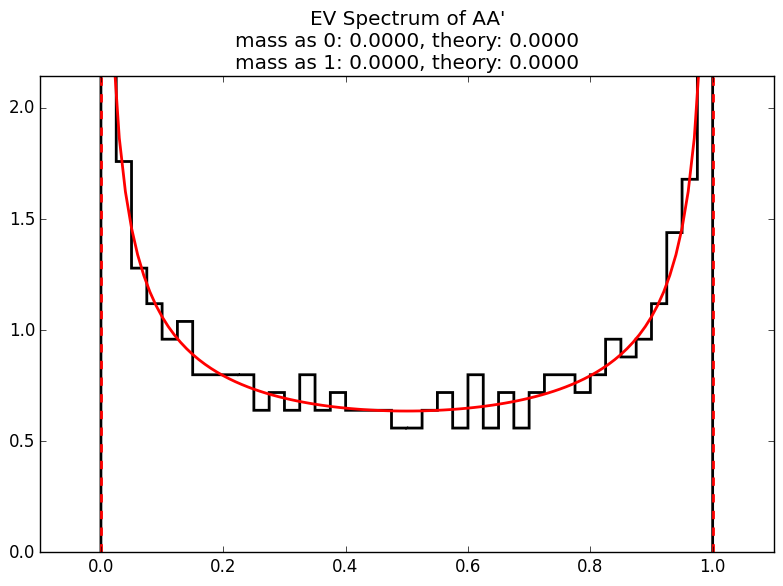

In [1]:
using PyPlot
using Interact
PyPlot.svg(true)

f = figure(figsize=(8, 6))
N = 1000
delta = sqrt(eps(Float64))
@manipulate for k = 0.01:0.01:1, m = 0.01:0.01:1
    withfig(f) do
        if k <= m
            K, M = int(k * N), int(m * N)
            U = qr(randn(N, K))[1]
            S = eye(N)[randperm(N)[1:M], :]
            es = abs(eig(S * U * U' * S')[1])

            lp, lm = (sqrt(k * (1 - m)) + sqrt(m * (1 - k)))^2, (sqrt(k * (1 - m)) - sqrt(m * (1 - k)))^2
            ls = linspace(lm, lp, 101)
            rho(l) = sqrt((l - lm) * (lp - l)) / 2 / pi / m / l / (1 - l)
            rhos = map(rho, ls)

            plt.hist(es, normed=true, histtype="step", bins=40, linewidth=2, color="k")
            plot(ls, rhos, linewidth=2, color="r")
            axvline(lp, linestyle="--", linewidth=2, color="r")
            axvline(lm, linestyle="--", linewidth=2, color="r")
            xlim([-0.1, 1.1]); ylim([0, maximum(sqrt(rhos)) * 1.2])

            zm, zm_theory = @sprintf("%.4f", sum(es .< delta) / M), @sprintf("%.4f", (m - k) / m)
            om, om_theory = @sprintf("%.4f", sum(es .> 1 - delta) / M), @sprintf("%.4f", 1 - m < k ? (m + k - 1) / m : 0)
            title("EV Spectrum of AA'\nmass as 0: $zm, theory: $zm_theory\nmass as 1: $om, theory: $om_theory")
            
            tight_layout()
        end
    end
end